In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create images with white backgrounds
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='damaged.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('damaged.zip')

In [ ]:
!unzip damaged.zip

Streaming output truncated to the last 5000 lines.
  inflating: damaged/train/10/10_new_165.jpg  
  inflating: damaged/train/10/10_new_166.jpg  
  inflating: damaged/train/10/10_new_167.jpg  
  inflating: damaged/train/10/10_new_168.jpg  
  inflating: damaged/train/10/10_new_169.jpg  
  inflating: damaged/train/10/10_new_17.jpg  
  inflating: damaged/train/10/10_new_170.jpg  
  inflating: damaged/train/10/10_new_171.jpg  
  inflating: damaged/train/10/10_new_172.jpg  
  inflating: damaged/train/10/10_new_173.jpg  
  inflating: damaged/train/10/10_new_174.jpg  
  inflating: damaged/train/10/10_new_175.jpg  
  inflating: damaged/train/10/10_new_176.jpg  
  inflating: damaged/train/10/10_new_177.jpg  
  inflating: damaged/train/10/10_new_178.jpg  
  inflating: damaged/train/10/10_new_179.jpg  
  inflating: damaged/train/10/10_new_18.jpg  
  inflating: damaged/train/10/10_new_180.jpg  
  inflating: damaged/train/10/10_new_181.jpg  
  inflating: damaged/train/10/10_new_182.jpg  
  inflating

In [ ]:
PATH = '/content/damaged'

In [ ]:
os.listdir(PATH)

['train', 'test']

In [ ]:
train_dir = os.path.join(PATH,
                         'train')
test_dir = os.path.join(PATH,
                        'test')

In [ ]:
train_ten_dir = os.path.join(train_dir,
                                '10')
train_twenty_dir = os.path.join(train_dir,
                                   '20')
train_fifty_dir = os.path.join(train_dir,
                               '50')
train_hundered_dir = os.path.join(train_dir,
                               '100')

test_ten_dir = os.path.join(test_dir,
                               '10')
test_twenty_dir = os.path.join(test_dir,
                                  '20')
test_fifty_dir = os.path.join(test_dir,
                              '50')
test_hundered_dir = os.path.join(test_dir,
                               '100')


In [ ]:
len(os.listdir(train_ten_dir))

1285

In [ ]:
len(os.listdir(test_ten_dir))

10

In [ ]:
IMG_HEIGHT = 212
IMG_WIDTH = 212
batch_size = 32

In [ ]:
image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [ ]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 5070 images belonging to 4 classes.


In [ ]:
test_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 55 images belonging to 4 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

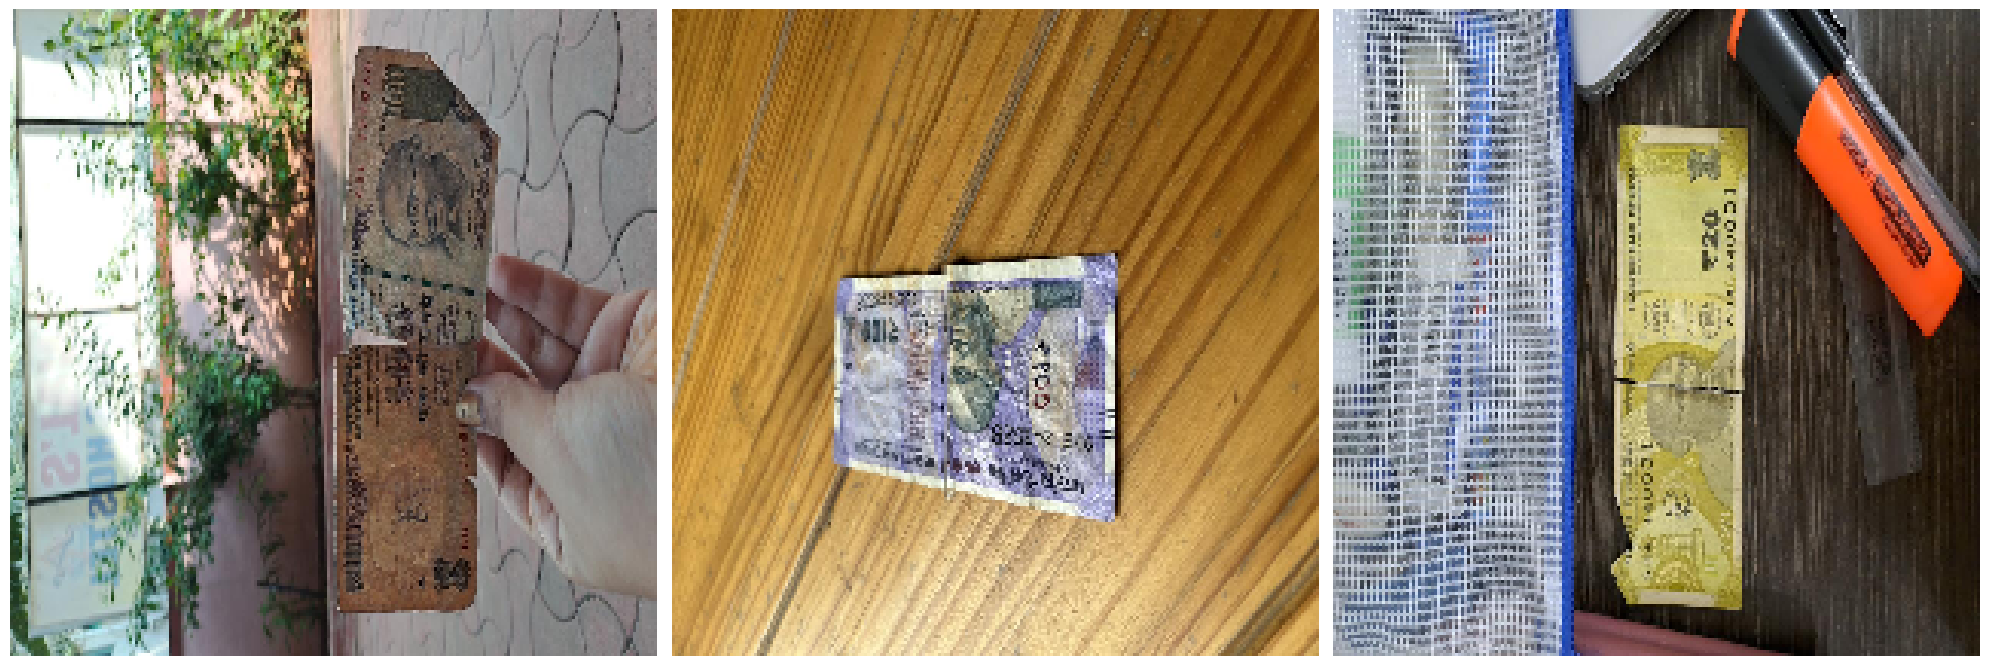

In [ ]:
plotImages(sample_training_images[1:5])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 212, 212, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 106, 106, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 106, 106, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,606,884 (9.94 MB)

 Trainable params: 2,606,884 (9.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 16
epochs = 20

In [ ]:
num_ten_train = len(os.listdir(train_ten_dir))
num_twenty_train = len(os.listdir(train_twenty_dir))
num_fifty_train = len(os.listdir(train_fifty_dir))
num_hundered_train = len(os.listdir(train_hundered_dir))

num_ten_test = len(os.listdir(test_ten_dir))
num_twenty_test = len(os.listdir(test_twenty_dir))
num_fifty_test = len(os.listdir(test_fifty_dir))
num_hundered_test = len(os.listdir(test_hundered_dir))

total_train = num_ten_train + num_twenty_train + num_fifty_train + num_hundered_train
total_test = num_ten_test + num_twenty_test + num_fifty_test + num_hundered_test

In [ ]:
steps_per_epoch = total_train // batch_size
validation_steps = total_test // batch_size

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=validation_steps,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=7
    )]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


159/316 ━━━━━━━━━━━━━━━━━━━━ 5:05 2s/step - accuracy: 0.2438 - loss: 1.4178

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


316/316 ━━━━━━━━━━━━━━━━━━━━ 317s 983ms/step - accuracy: 0.2499 - loss: 1.4056 - val_accuracy: 0.2727 - val_loss: 1.3834
Epoch 2/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 304s 954ms/step - accuracy: 0.3333 - loss: 1.3334 - val_accuracy: 0.2364 - val_loss: 1.3763
Epoch 3/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 317s 936ms/step - accuracy: 0.5050 - loss: 1.0823 - val_accuracy: 0.3455 - val_loss: 1.3515
Epoch 4/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 322s 939ms/step - accuracy: 0.6327 - loss: 0.8270 - val_accuracy: 0.5091 - val_loss: 1.3241
Epoch 5/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 299s 936ms/step - accuracy: 0.6969 - loss: 0.7037 - val_accuracy: 0.3091 - val_loss: 1.3916
Epoch 6/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 326s 951ms/step - accuracy: 0.7587 - loss: 0.5840 - val_accuracy: 0.5273 - val_loss: 1.2741
Epoch 7/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 320s 944ms/step - accuracy: 0.8039 - loss: 0.4782 - val_accuracy: 0.5273 - val_loss: 1.1854
Epoch 8/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 321s 937ms/step - accuracy: 0.8398 - loss: 0.39

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

In [ ]:
img_path = '/content/damaged/test/10/10_old_650.jpg'
img_array = load_and_preprocess_image(img_path)

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


In [ ]:
class_labels = list(train_data_gen.class_indices.keys())  # Get class labels from training data generator
predicted_label = class_labels[predicted_class[0]]

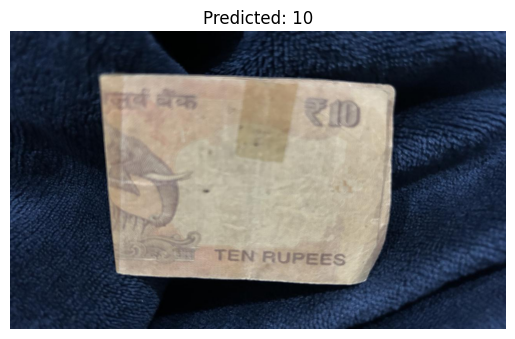

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load and display the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_label}')
plt.show()